In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2 3 4 5 6 7]


In [3]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


In [4]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.2)
print(round(bandwidth, 3))

1.444


In [5]:
import pandas as pd

df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
df['target'] = y

best_bandwidth = estimate_bandwidth(X, quantile=0.2)

meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


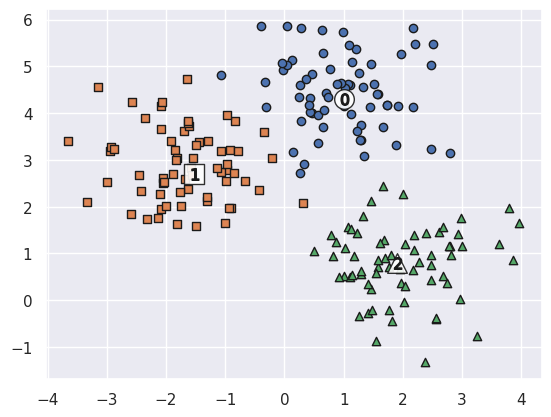

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = df[df['meanshift_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [13]:
print(df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  66
Name: meanshift_label, dtype: int64


In [14]:
df.head()

,ftr1,ftr2,target,meanshift_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
